In [45]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [64]:
url = "https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Task:
### 1. Use KMeans to create various customer segments.
* Use an Elbow Plot of inertia.
* And a plot of Silhouette Scores.
* Choose a K based on the results.
### 2. Submit your notebook below.

In [65]:
# select columns
selected_cl = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt','Defaulted','DebtIncomeRatio']]
selected_cl.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [66]:
cl_len = len(selected_cl['Defaulted'])
print((selected_cl['Defaulted'].isna().sum()/cl_len)*100)

17.647058823529413


In [67]:
selected_cl['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [68]:
selected_cl['Defaulted'].fillna(selected_cl['Defaulted'].value_counts()[0], inplace=True)
selected_cl['Defaulted'].isna().sum()

/var/folders/bd/fvqpk7z56rx6hbh4dzm7dmc80000gn/T/ipykernel_88217/1030325695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cl['Defaulted'].fillna(selected_cl['Defaulted'].value_counts()[0], inplace=True)


0

In [69]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(selected_cl)

In [70]:
# Create an empty list for inertias
inertias_list = []
# Create an empty list for silhouette
silhouette_scores = []
# Create range from 2 to 10
k_ranges =range(2,11)
# lets loop for cluster and silhouette score
for k in k_ranges:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

Text(0, 0.5, 'inertia')

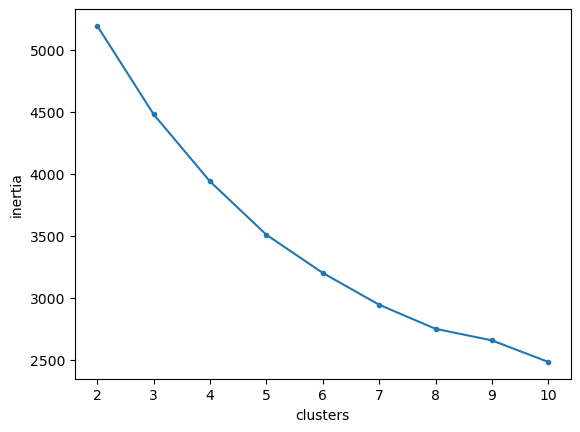

In [71]:
#Visualize scores
plt.plot(k_ranges, inertias_list, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

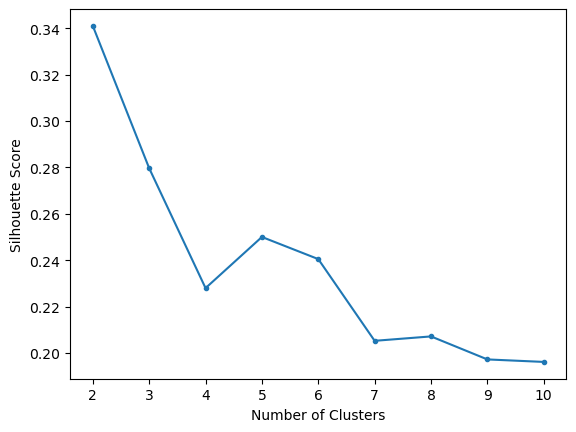

In [72]:
# Visualize scores
plt.plot(k_ranges, silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [73]:
# Fit kmeans model with 3 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.2801137125714896